In [ ]:
#Creamos las carpetas deseadas.
!mkdir Diana
!mkdir Test

In [ ]:
#mostramos el contenido de las carpetas.
!ls /content/Diana | wc -l
!ls /content/Test | wc -l

100
8


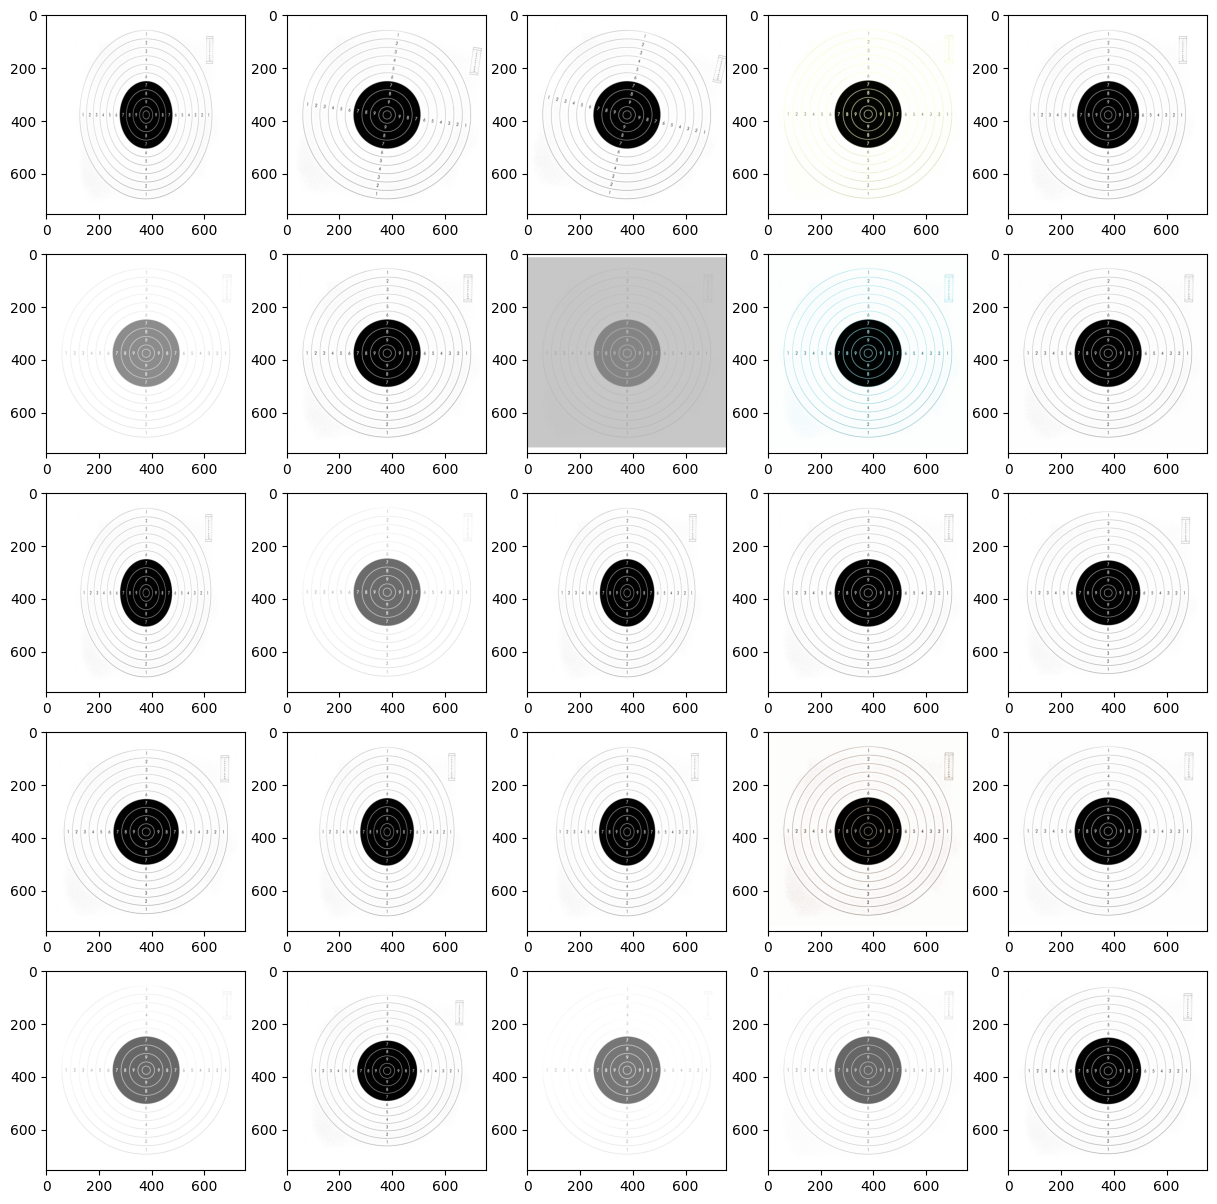

In [ ]:
#mostramos mas imagenes
import os
import matplotlib.pyplot as plt
import matplotlib.image as mping

plt.figure(figsize=(15,15))

carpeta = '/content/Diana'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
    plt.subplot(5,5,i+1)
    imagen = mping.imread(carpeta + '/' + nombreimg)
    plt.imshow(imagen)

In [ ]:
#crear carpetas para hacer el set de datos.
!mkdir dataset
!mkdir dataset/Diana
!mkdir dataset/No_diana

In [ ]:
#copiar imagenes a las nuevas carpetas.
#limitar el numero al mas pequeño de los sets.
import shutil
carpeta_fuente = '/content/Diana'
carpeta_destino = '/content/dataset/Diana'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 110:
    #copia de la carpeta fuente a la de destino.
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
#mostramos el contenido de las carpetas.
!ls /content/dataset/Diana| wc -l
!ls /content/dataset/No_diana| wc -l

100
0


Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


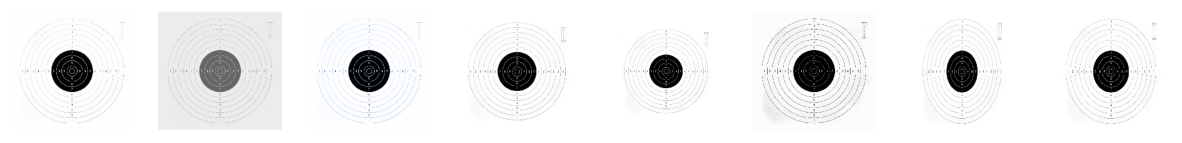

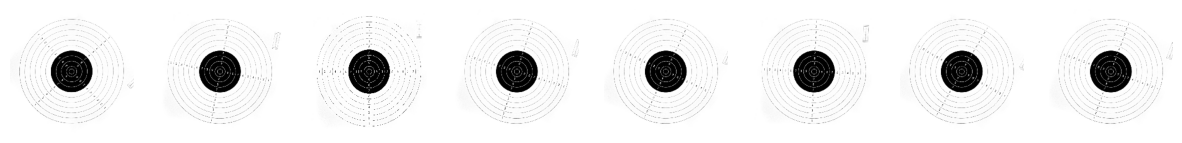

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Crear el generador de imágenes sin transformaciones
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Crear el generador de entrenamiento
data_gen_entrenamiento = datagen.flow_from_directory(
    '/content/dataset',
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset='training'
)

# Crear el generador de validación
data_gen_validacion = datagen.flow_from_directory(
    '/content/dataset',
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset='validation'
)

def mostrar_ejemplos(data_gen, num_ejemplos=8):
    imagenes, _ = next(data_gen)
    fig, axs = plt.subplots(1, num_ejemplos, figsize=(15, 15))
    for i in range(num_ejemplos):
        axs[i].imshow(imagenes[i])
        axs[i].axis('off')
    plt.show()

# Mostrar ejemplos del conjunto de entrenamiento
mostrar_ejemplos(data_gen_entrenamiento)

# Mostrar ejemplos del conjunto de validación
mostrar_ejemplos(data_gen_validacion)

In [ ]:
print(data_gen_entrenamiento.class_indices)

{'Diana': 0, 'No_diana': 1}


In [ ]:
indices_de_clase = data_gen_entrenamiento.class_indices


In [ ]:
#modelo preentrenado.
import tensorflow as tf
import tensorflow_hub as hub

url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [ ]:
modelo = tf.keras.Sequential([
   mobilenetv2,
   tf.keras.layers.Dense(2, activation = 'softmax') 
])

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#entrenar el modelo.
EPOCAS=50

historial = modelo.fit(
    data_gen_entrenamiento, epochs=50, batch_size=32,
    validation_data=data_gen_validacion
)

Epoch 1/50
3/3 [==============================] - 13s 963ms/step - loss: 0.3209 - accuracy: 0.9500 - val_loss: 0.0686 - val_accuracy: 1.0000
Epoch 2/50
3/3 [==============================] - 1s 260ms/step - loss: 0.0515 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 3/50
3/3 [==============================] - 1s 318ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 1s 443ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 9.7054e-04 - val_accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 1s 358ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.6517e-04 - val_accuracy: 1.0000
Epoch 6/50
3/3 [==============================] - 1s 275ms/step - loss: 5.6778e-04 - accuracy: 1.0000 - val_loss: 2.6803e-04 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 1s 331ms/step - loss: 3.3900e-04 - accuracy: 1.0000 - val_loss: 1.7679e-04 - val_accuracy: 1.

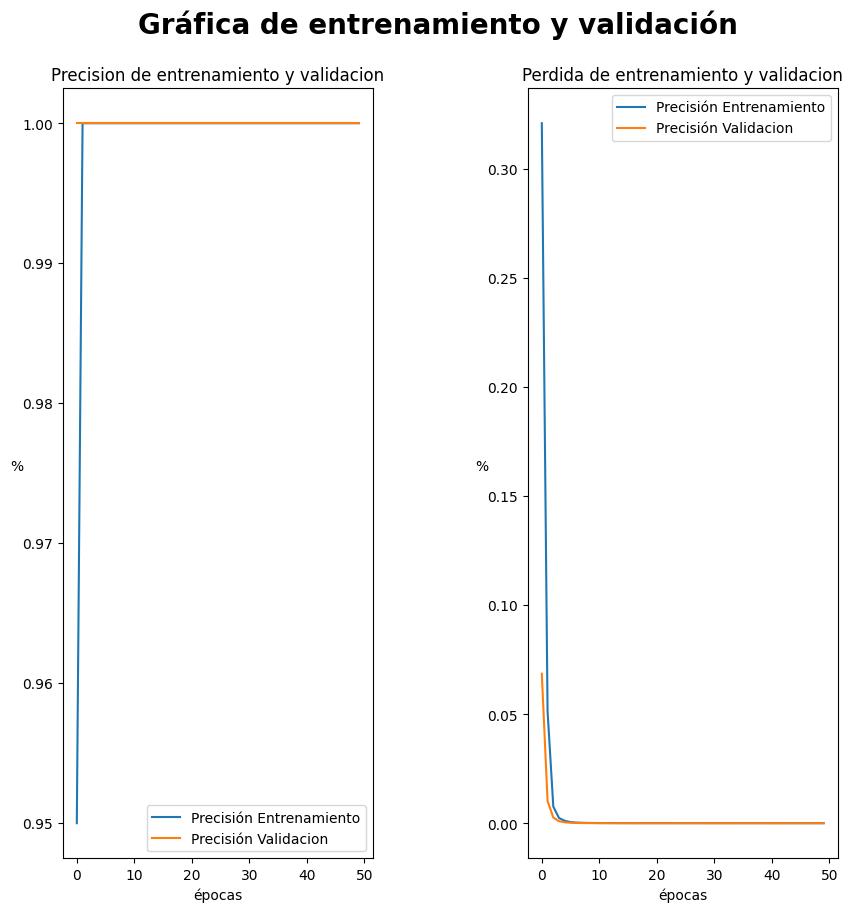

In [ ]:
#grafica de acc.
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Validacion')
plt.legend(loc='lower right')
plt.title('Precision de entrenamiento y validacion')
plt.xlabel('épocas')
plt.ylabel('%', rotation=0)

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_loss, label='Precisión Validacion')
plt.legend(loc='upper right')
plt.title('Perdida de entrenamiento y validacion')
plt.xlabel('épocas')
plt.ylabel('%', rotation=0)

plt.suptitle('Gráfica de entrenamiento y validación', fontsize=20, fontweight='bold', y=0.959)
plt.subplots_adjust(wspace=0.5)

plt.show()

# **1. Test**

Test 1
Las imágenes disponibles son:
0: 0.Mouse.jpg
1: 1.Teclado.jpg
2: 2.Rueda de carro.jpg
3: 3.Rueda de coche.jpg
4: 4.Diana de dardo.jpg
5: 5.DIANA (train).jpeg
6: 6.Diana aire comprimido.jpg
7: 7.Diana colores.jpg
Por favor, seleccione un número de imagen: 0


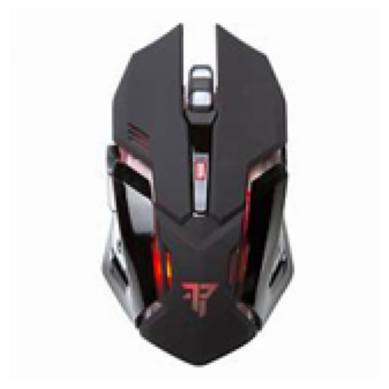

1/1 [==============================] - 0s 27ms/step
Clase 0: 1.000
Clase 1: 0.000
1/1 [==============================] - 0s 21ms/step
La clase predicha es Diana (número 0) con una precisión de 1.000.


In [ ]:
import os
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

def categorizar(ruta_local, class_indices):
    # Cargar la imagen desde el conjunto de datos local
    img = Image.open(ruta_local)
    img = np.array(img).astype(float)/255

    img = cv2.resize(img, (224,224))
    prediccion = modelo.predict(img.reshape(-1,224,224,3))

    # Obtener la etiqueta de clase predicha y su precisión
    etiqueta_de_clase_predicha = np.argmax(prediccion[0], axis=-1)
    precision = round(prediccion[0][etiqueta_de_clase_predicha], 3)

    # Asignar la etiqueta de clase predicha a su nombre de clase correspondiente
    nombre_de_clase_predicho = list(class_indices.keys())[list(class_indices.values()).index(etiqueta_de_clase_predicha)]

    # Devolver el resultado
    return nombre_de_clase_predicho, etiqueta_de_clase_predicha, precision

# Solicitar al usuario que ingrese la ruta de la carpeta que contiene las imágenes
ruta_carpeta = '/content/Test'

# Comprobar si la ruta es válida
if not os.path.isdir(ruta_carpeta):
    print('La ruta especificada no es válida. Saliendo...')
else:
    # Obtener la lista de imágenes en la carpeta y ordenarla en orden ascendente
    lista_imagenes = sorted(os.listdir(ruta_carpeta))

    # Mostrar la lista de imágenes disponibles
    print('Test 1')
    print('Las imágenes disponibles son:')
    for i, imagen in enumerate(lista_imagenes):
        print(f'{i}: {imagen}')

    # Solicitar al usuario que seleccione un número de imagen
    num_imagen = int(input('Por favor, seleccione un número de imagen: '))

    # Comprobar si el número de imagen es válido
    if num_imagen < 0 or num_imagen >= len(lista_imagenes):
        print('Número de imagen inválido. Saliendo...')
    else:
        # Seleccionar la imagen correspondiente al número seleccionado
        imagen_seleccionada = lista_imagenes[num_imagen]
        ruta_imagen_seleccionada = os.path.join(ruta_carpeta, imagen_seleccionada)

        # Cargar la imagen seleccionada y mostrarla
        img = Image.open(ruta_imagen_seleccionada)
        img = img.rotate(0, expand=True)
        img = img.resize((160, 160))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # Preprocesar la imagen seleccionada
        img_copy = img.copy()
        img_copy = img_copy.resize((224, 224))
        x = np.array(img_copy).astype(float)/255
        x = np.expand_dims(x, axis=0)

        # Realizar la predicción y mostrar los resultados
        prediccion = modelo.predict(x)
        for i in range(len(prediccion[0])):
            print(f"Clase {i}: {prediccion[0][i]:.3f}")
        nombre_de_clase_predicho, etiqueta_de_clase_predicha, precision = categorizar(ruta_imagen_seleccionada, indices_de_clase)
        print(f"La clase predicha es {nombre_de_clase_predicho} (número {etiqueta_de_clase_predicha}) con una precisión de {precision:.3f}.")

# **2. Test**

Test 2
Las imágenes disponibles son:
0: 0.Mouse.jpg
1: 1.Teclado.jpg
2: 2.Rueda de carro.jpg
3: 3.Rueda de coche.jpg
4: 4.Diana de dardo.jpg
5: 5.DIANA (train).jpeg
6: 6.Diana aire comprimido.jpg
7: 7.Diana colores.jpg
Por favor, seleccione un número de imagen: 1


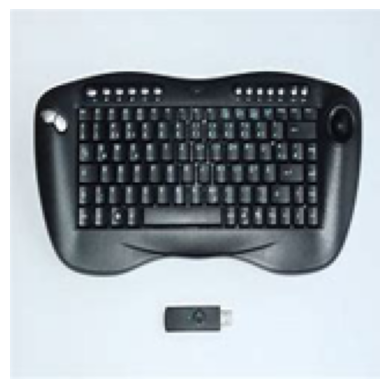

1/1 [==============================] - 0s 22ms/step
Clase 0: 0.997
Clase 1: 0.003
1/1 [==============================] - 0s 21ms/step
La clase predicha es Diana (número 0) con una precisión de 0.995.


In [ ]:
import os
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

def categorizar(ruta_local, class_indices):
    # Cargar la imagen desde el conjunto de datos local
    img = Image.open(ruta_local)
    img = np.array(img).astype(float)/255

    img = cv2.resize(img, (224,224))
    prediccion = modelo.predict(img.reshape(-1,224,224,3))

    # Obtener la etiqueta de clase predicha y su precisión
    etiqueta_de_clase_predicha = np.argmax(prediccion[0], axis=-1)
    precision = round(prediccion[0][etiqueta_de_clase_predicha], 3)

    # Asignar la etiqueta de clase predicha a su nombre de clase correspondiente
    nombre_de_clase_predicho = list(class_indices.keys())[list(class_indices.values()).index(etiqueta_de_clase_predicha)]

    # Devolver el resultado
    return nombre_de_clase_predicho, etiqueta_de_clase_predicha, precision

# Solicitar al usuario que ingrese la ruta de la carpeta que contiene las imágenes
ruta_carpeta = '/content/Test'

# Comprobar si la ruta es válida
if not os.path.isdir(ruta_carpeta):
    print('La ruta especificada no es válida. Saliendo...')
else:
    # Obtener la lista de imágenes en la carpeta y ordenarla en orden ascendente
    lista_imagenes = sorted(os.listdir(ruta_carpeta))

    # Mostrar la lista de imágenes disponibles
    print('Test 2')
    print('Las imágenes disponibles son:')
    for i, imagen in enumerate(lista_imagenes):
        print(f'{i}: {imagen}')

    # Solicitar al usuario que seleccione un número de imagen
    num_imagen = int(input('Por favor, seleccione un número de imagen: '))

    # Comprobar si el número de imagen es válido
    if num_imagen < 0 or num_imagen >= len(lista_imagenes):
        print('Número de imagen inválido. Saliendo...')
    else:
        # Seleccionar la imagen correspondiente al número seleccionado
        imagen_seleccionada = lista_imagenes[num_imagen]
        ruta_imagen_seleccionada = os.path.join(ruta_carpeta, imagen_seleccionada)

        # Cargar la imagen seleccionada y mostrarla
        img = Image.open(ruta_imagen_seleccionada)
        img = img.rotate(0, expand=True)
        img = img.resize((160, 160))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # Preprocesar la imagen seleccionada
        img_copy = img.copy()
        img_copy = img_copy.resize((224, 224))
        x = np.array(img_copy).astype(float)/255
        x = np.expand_dims(x, axis=0)

        # Realizar la predicción y mostrar los resultados
        prediccion = modelo.predict(x)
        for i in range(len(prediccion[0])):
            print(f"Clase {i}: {prediccion[0][i]:.3f}")
        nombre_de_clase_predicho, etiqueta_de_clase_predicha, precision = categorizar(ruta_imagen_seleccionada, indices_de_clase)
        print(f"La clase predicha es {nombre_de_clase_predicho} (número {etiqueta_de_clase_predicha}) con una precisión de {precision:.3f}.")

# **3. Test**

Test 3
Las imágenes disponibles son:
0: 0.Mouse.jpg
1: 1.Teclado.jpg
2: 2.Rueda de carro.jpg
3: 3.Rueda de coche.jpg
4: 4.Diana de dardo.jpg
5: 5.DIANA (train).jpeg
6: 6.Diana aire comprimido.jpg
7: 7.Diana colores.jpg
Por favor, seleccione un número de imagen: 2


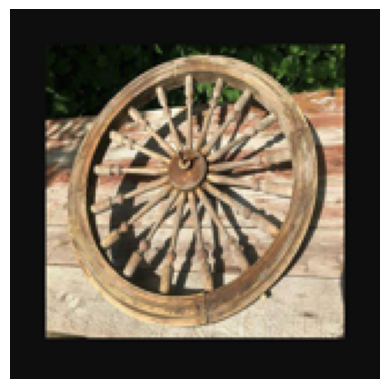

1/1 [==============================] - 0s 23ms/step
Clase 0: 1.000
Clase 1: 0.000
1/1 [==============================] - 0s 22ms/step
La clase predicha es Diana (número 0) con una precisión de 1.000.


In [ ]:
import os
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

def categorizar(ruta_local, class_indices):
    # Cargar la imagen desde el conjunto de datos local
    img = Image.open(ruta_local)
    img = np.array(img).astype(float)/255

    img = cv2.resize(img, (224,224))
    prediccion = modelo.predict(img.reshape(-1,224,224,3))

    # Obtener la etiqueta de clase predicha y su precisión
    etiqueta_de_clase_predicha = np.argmax(prediccion[0], axis=-1)
    precision = round(prediccion[0][etiqueta_de_clase_predicha], 3)

    # Asignar la etiqueta de clase predicha a su nombre de clase correspondiente
    nombre_de_clase_predicho = list(class_indices.keys())[list(class_indices.values()).index(etiqueta_de_clase_predicha)]

    # Devolver el resultado
    return nombre_de_clase_predicho, etiqueta_de_clase_predicha, precision

# Solicitar al usuario que ingrese la ruta de la carpeta que contiene las imágenes
ruta_carpeta = '/content/Test'

# Comprobar si la ruta es válida
if not os.path.isdir(ruta_carpeta):
    print('La ruta especificada no es válida. Saliendo...')
else:
    # Obtener la lista de imágenes en la carpeta y ordenarla en orden ascendente
    lista_imagenes = sorted(os.listdir(ruta_carpeta))

    # Mostrar la lista de imágenes disponibles
    print('Test 3')
    print('Las imágenes disponibles son:')
    for i, imagen in enumerate(lista_imagenes):
        print(f'{i}: {imagen}')

    # Solicitar al usuario que seleccione un número de imagen
    num_imagen = int(input('Por favor, seleccione un número de imagen: '))

    # Comprobar si el número de imagen es válido
    if num_imagen < 0 or num_imagen >= len(lista_imagenes):
        print('Número de imagen inválido. Saliendo...')
    else:
        # Seleccionar la imagen correspondiente al número seleccionado
        imagen_seleccionada = lista_imagenes[num_imagen]
        ruta_imagen_seleccionada = os.path.join(ruta_carpeta, imagen_seleccionada)

        # Cargar la imagen seleccionada y mostrarla
        img = Image.open(ruta_imagen_seleccionada)
        img = img.rotate(0, expand=True)
        img = img.resize((160, 160))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # Preprocesar la imagen seleccionada
        img_copy = img.copy()
        img_copy = img_copy.resize((224, 224))
        x = np.array(img_copy).astype(float)/255
        x = np.expand_dims(x, axis=0)

        # Realizar la predicción y mostrar los resultados
        prediccion = modelo.predict(x)
        for i in range(len(prediccion[0])):
            print(f"Clase {i}: {prediccion[0][i]:.3f}")
        nombre_de_clase_predicho, etiqueta_de_clase_predicha, precision = categorizar(ruta_imagen_seleccionada, indices_de_clase)
        print(f"La clase predicha es {nombre_de_clase_predicho} (número {etiqueta_de_clase_predicha}) con una precisión de {precision:.3f}.")

# **4. Test**

Test 4
Las imágenes disponibles son:
0: 0.Mouse.jpg
1: 1.Teclado.jpg
2: 2.Rueda de carro.jpg
3: 3.Rueda de coche.jpg
4: 4.Diana de dardo.jpg
5: 5.DIANA (train).jpeg
6: 6.Diana aire comprimido.jpg
7: 7.Diana colores.jpg
Por favor, seleccione un número de imagen: 3


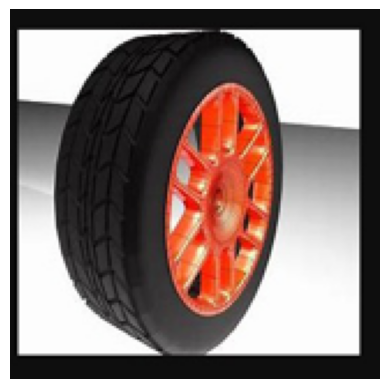

1/1 [==============================] - 0s 22ms/step
Clase 0: 1.000
Clase 1: 0.000
1/1 [==============================] - 0s 24ms/step
La clase predicha es Diana (número 0) con una precisión de 1.000.


In [ ]:
import os
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

def categorizar(ruta_local, class_indices):
    # Cargar la imagen desde el conjunto de datos local
    img = Image.open(ruta_local)
    img = np.array(img).astype(float)/255

    img = cv2.resize(img, (224,224))
    prediccion = modelo.predict(img.reshape(-1,224,224,3))

    # Obtener la etiqueta de clase predicha y su precisión
    etiqueta_de_clase_predicha = np.argmax(prediccion[0], axis=-1)
    precision = round(prediccion[0][etiqueta_de_clase_predicha], 3)

    # Asignar la etiqueta de clase predicha a su nombre de clase correspondiente
    nombre_de_clase_predicho = list(class_indices.keys())[list(class_indices.values()).index(etiqueta_de_clase_predicha)]

    # Devolver el resultado
    return nombre_de_clase_predicho, etiqueta_de_clase_predicha, precision

# Solicitar al usuario que ingrese la ruta de la carpeta que contiene las imágenes
ruta_carpeta = '/content/Test'

# Comprobar si la ruta es válida
if not os.path.isdir(ruta_carpeta):
    print('La ruta especificada no es válida. Saliendo...')
else:
    # Obtener la lista de imágenes en la carpeta y ordenarla en orden ascendente
    lista_imagenes = sorted(os.listdir(ruta_carpeta))

    # Mostrar la lista de imágenes disponibles
    print('Test 4')
    print('Las imágenes disponibles son:')
    for i, imagen in enumerate(lista_imagenes):
        print(f'{i}: {imagen}')

    # Solicitar al usuario que seleccione un número de imagen
    num_imagen = int(input('Por favor, seleccione un número de imagen: '))

    # Comprobar si el número de imagen es válido
    if num_imagen < 0 or num_imagen >= len(lista_imagenes):
        print('Número de imagen inválido. Saliendo...')
    else:
        # Seleccionar la imagen correspondiente al número seleccionado
        imagen_seleccionada = lista_imagenes[num_imagen]
        ruta_imagen_seleccionada = os.path.join(ruta_carpeta, imagen_seleccionada)

        # Cargar la imagen seleccionada y mostrarla
        img = Image.open(ruta_imagen_seleccionada)
        img = img.rotate(0, expand=True)
        img = img.resize((160, 160))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # Preprocesar la imagen seleccionada
        img_copy = img.copy()
        img_copy = img_copy.resize((224, 224))
        x = np.array(img_copy).astype(float)/255
        x = np.expand_dims(x, axis=0)

        # Realizar la predicción y mostrar los resultados
        prediccion = modelo.predict(x)
        for i in range(len(prediccion[0])):
            print(f"Clase {i}: {prediccion[0][i]:.3f}")
        nombre_de_clase_predicho, etiqueta_de_clase_predicha, precision = categorizar(ruta_imagen_seleccionada, indices_de_clase)
        print(f"La clase predicha es {nombre_de_clase_predicho} (número {etiqueta_de_clase_predicha}) con una precisión de {precision:.3f}.")

# **5. Test**

Test 5
Las imágenes disponibles son:
0: 0.Mouse.jpg
1: 1.Teclado.jpg
2: 2.Rueda de carro.jpg
3: 3.Rueda de coche.jpg
4: 4.Diana de dardo.jpg
5: 5.DIANA (train).jpeg
6: 6.Diana aire comprimido.jpg
7: 7.Diana colores.jpg
Por favor, seleccione un número de imagen: 4


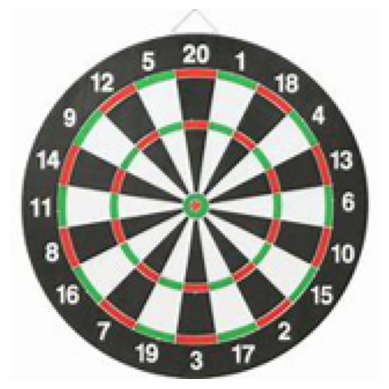

1/1 [==============================] - 0s 32ms/step
Clase 0: 0.998
Clase 1: 0.002
1/1 [==============================] - 0s 37ms/step
La clase predicha es Diana (número 0) con una precisión de 0.999.


In [ ]:
import os
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

def categorizar(ruta_local, class_indices):
    # Cargar la imagen desde el conjunto de datos local
    img = Image.open(ruta_local)
    img = np.array(img).astype(float)/255

    img = cv2.resize(img, (224,224))
    prediccion = modelo.predict(img.reshape(-1,224,224,3))

    # Obtener la etiqueta de clase predicha y su precisión
    etiqueta_de_clase_predicha = np.argmax(prediccion[0], axis=-1)
    precision = round(prediccion[0][etiqueta_de_clase_predicha], 3)

    # Asignar la etiqueta de clase predicha a su nombre de clase correspondiente
    nombre_de_clase_predicho = list(class_indices.keys())[list(class_indices.values()).index(etiqueta_de_clase_predicha)]

    # Devolver el resultado
    return nombre_de_clase_predicho, etiqueta_de_clase_predicha, precision

# Solicitar al usuario que ingrese la ruta de la carpeta que contiene las imágenes
ruta_carpeta = '/content/Test'

# Comprobar si la ruta es válida
if not os.path.isdir(ruta_carpeta):
    print('La ruta especificada no es válida. Saliendo...')
else:
    # Obtener la lista de imágenes en la carpeta y ordenarla en orden ascendente
    lista_imagenes = sorted(os.listdir(ruta_carpeta))

    # Mostrar la lista de imágenes disponibles
    print('Test 5')
    print('Las imágenes disponibles son:')
    for i, imagen in enumerate(lista_imagenes):
        print(f'{i}: {imagen}')

    # Solicitar al usuario que seleccione un número de imagen
    num_imagen = int(input('Por favor, seleccione un número de imagen: '))

    # Comprobar si el número de imagen es válido
    if num_imagen < 0 or num_imagen >= len(lista_imagenes):
        print('Número de imagen inválido. Saliendo...')
    else:
        # Seleccionar la imagen correspondiente al número seleccionado
        imagen_seleccionada = lista_imagenes[num_imagen]
        ruta_imagen_seleccionada = os.path.join(ruta_carpeta, imagen_seleccionada)

        # Cargar la imagen seleccionada y mostrarla
        img = Image.open(ruta_imagen_seleccionada)
        img = img.rotate(0, expand=True)
        img = img.resize((160, 160))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # Preprocesar la imagen seleccionada
        img_copy = img.copy()
        img_copy = img_copy.resize((224, 224))
        x = np.array(img_copy).astype(float)/255
        x = np.expand_dims(x, axis=0)

        # Realizar la predicción y mostrar los resultados
        prediccion = modelo.predict(x)
        for i in range(len(prediccion[0])):
            print(f"Clase {i}: {prediccion[0][i]:.3f}")
        nombre_de_clase_predicho, etiqueta_de_clase_predicha, precision = categorizar(ruta_imagen_seleccionada, indices_de_clase)
        print(f"La clase predicha es {nombre_de_clase_predicho} (número {etiqueta_de_clase_predicha}) con una precisión de {precision:.3f}.")

# **6. Test**

Test 6
Las imágenes disponibles son:
0: 0.Mouse.jpg
1: 1.Teclado.jpg
2: 2.Rueda de carro.jpg
3: 3.Rueda de coche.jpg
4: 4.Diana de dardo.jpg
5: 5.DIANA (train).jpeg
6: 6.Diana aire comprimido.jpg
7: 7.Diana colores.jpg
Por favor, seleccione un número de imagen: 5


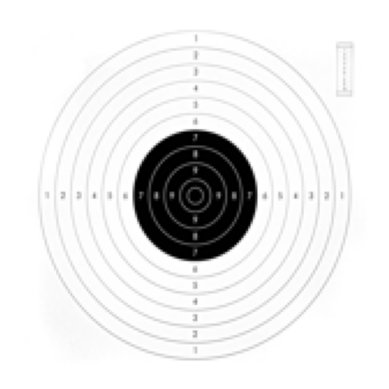

1/1 [==============================] - 0s 24ms/step
Clase 0: 1.000
Clase 1: 0.000
1/1 [==============================] - 0s 21ms/step
La clase predicha es Diana (número 0) con una precisión de 1.000.


In [ ]:
import os
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

def categorizar(ruta_local, class_indices):
    # Cargar la imagen desde el conjunto de datos local
    img = Image.open(ruta_local)
    img = np.array(img).astype(float)/255

    img = cv2.resize(img, (224,224))
    prediccion = modelo.predict(img.reshape(-1,224,224,3))

    # Obtener la etiqueta de clase predicha y su precisión
    etiqueta_de_clase_predicha = np.argmax(prediccion[0], axis=-1)
    precision = round(prediccion[0][etiqueta_de_clase_predicha], 3)

    # Asignar la etiqueta de clase predicha a su nombre de clase correspondiente
    nombre_de_clase_predicho = list(class_indices.keys())[list(class_indices.values()).index(etiqueta_de_clase_predicha)]

    # Devolver el resultado
    return nombre_de_clase_predicho, etiqueta_de_clase_predicha, precision

# Solicitar al usuario que ingrese la ruta de la carpeta que contiene las imágenes
ruta_carpeta = '/content/Test'

# Comprobar si la ruta es válida
if not os.path.isdir(ruta_carpeta):
    print('La ruta especificada no es válida. Saliendo...')
else:
    # Obtener la lista de imágenes en la carpeta y ordenarla en orden ascendente
    lista_imagenes = sorted(os.listdir(ruta_carpeta))

    # Mostrar la lista de imágenes disponibles
    print('Test 6')
    print('Las imágenes disponibles son:')
    for i, imagen in enumerate(lista_imagenes):
        print(f'{i}: {imagen}')

    # Solicitar al usuario que seleccione un número de imagen
    num_imagen = int(input('Por favor, seleccione un número de imagen: '))

    # Comprobar si el número de imagen es válido
    if num_imagen < 0 or num_imagen >= len(lista_imagenes):
        print('Número de imagen inválido. Saliendo...')
    else:
        # Seleccionar la imagen correspondiente al número seleccionado
        imagen_seleccionada = lista_imagenes[num_imagen]
        ruta_imagen_seleccionada = os.path.join(ruta_carpeta, imagen_seleccionada)

        # Cargar la imagen seleccionada y mostrarla
        img = Image.open(ruta_imagen_seleccionada)
        img = img.rotate(0, expand=True)
        img = img.resize((160, 160))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # Preprocesar la imagen seleccionada
        img_copy = img.copy()
        img_copy = img_copy.resize((224, 224))
        x = np.array(img_copy).astype(float)/255
        x = np.expand_dims(x, axis=0)

        # Realizar la predicción y mostrar los resultados
        prediccion = modelo.predict(x)
        for i in range(len(prediccion[0])):
            print(f"Clase {i}: {prediccion[0][i]:.3f}")
        nombre_de_clase_predicho, etiqueta_de_clase_predicha, precision = categorizar(ruta_imagen_seleccionada, indices_de_clase)
        print(f"La clase predicha es {nombre_de_clase_predicho} (número {etiqueta_de_clase_predicha}) con una precisión de {precision:.3f}.")

# **7. Test**

Test 7
Las imágenes disponibles son:
0: 0.Mouse.jpg
1: 1.Teclado.jpg
2: 2.Rueda de carro.jpg
3: 3.Rueda de coche.jpg
4: 4.Diana de dardo.jpg
5: 5.DIANA (train).jpeg
6: 6.Diana aire comprimido.jpg
7: 7.Diana colores.jpg
Por favor, seleccione un número de imagen: 6


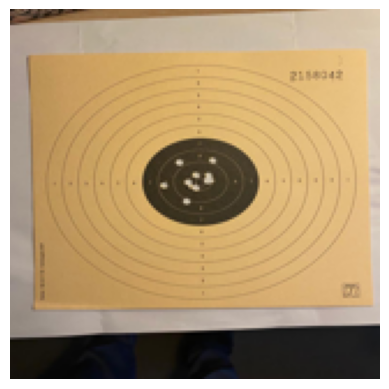

1/1 [==============================] - 0s 22ms/step
Clase 0: 1.000
Clase 1: 0.000
1/1 [==============================] - 0s 22ms/step
La clase predicha es Diana (número 0) con una precisión de 1.000.


In [ ]:
import os
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

def categorizar(ruta_local, class_indices):
    # Cargar la imagen desde el conjunto de datos local
    img = Image.open(ruta_local)
    img = np.array(img).astype(float)/255

    img = cv2.resize(img, (224,224))
    prediccion = modelo.predict(img.reshape(-1,224,224,3))

    # Obtener la etiqueta de clase predicha y su precisión
    etiqueta_de_clase_predicha = np.argmax(prediccion[0], axis=-1)
    precision = round(prediccion[0][etiqueta_de_clase_predicha], 3)

    # Asignar la etiqueta de clase predicha a su nombre de clase correspondiente
    nombre_de_clase_predicho = list(class_indices.keys())[list(class_indices.values()).index(etiqueta_de_clase_predicha)]

    # Devolver el resultado
    return nombre_de_clase_predicho, etiqueta_de_clase_predicha, precision

# Solicitar al usuario que ingrese la ruta de la carpeta que contiene las imágenes
ruta_carpeta = '/content/Test'

# Comprobar si la ruta es válida
if not os.path.isdir(ruta_carpeta):
    print('La ruta especificada no es válida. Saliendo...')
else:
    # Obtener la lista de imágenes en la carpeta y ordenarla en orden ascendente
    lista_imagenes = sorted(os.listdir(ruta_carpeta))

    # Mostrar la lista de imágenes disponibles
    print('Test 7')
    print('Las imágenes disponibles son:')
    for i, imagen in enumerate(lista_imagenes):
        print(f'{i}: {imagen}')

    # Solicitar al usuario que seleccione un número de imagen
    num_imagen = int(input('Por favor, seleccione un número de imagen: '))

    # Comprobar si el número de imagen es válido
    if num_imagen < 0 or num_imagen >= len(lista_imagenes):
        print('Número de imagen inválido. Saliendo...')
    else:
        # Seleccionar la imagen correspondiente al número seleccionado
        imagen_seleccionada = lista_imagenes[num_imagen]
        ruta_imagen_seleccionada = os.path.join(ruta_carpeta, imagen_seleccionada)

        # Cargar la imagen seleccionada y mostrarla
        img = Image.open(ruta_imagen_seleccionada)
        img = img.rotate(0, expand=True)
        img = img.resize((160, 160))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # Preprocesar la imagen seleccionada
        img_copy = img.copy()
        img_copy = img_copy.resize((224, 224))
        x = np.array(img_copy).astype(float)/255
        x = np.expand_dims(x, axis=0)

        # Realizar la predicción y mostrar los resultados
        prediccion = modelo.predict(x)
        for i in range(len(prediccion[0])):
            print(f"Clase {i}: {prediccion[0][i]:.3f}")
        nombre_de_clase_predicho, etiqueta_de_clase_predicha, precision = categorizar(ruta_imagen_seleccionada, indices_de_clase)
        print(f"La clase predicha es {nombre_de_clase_predicho} (número {etiqueta_de_clase_predicha}) con una precisión de {precision:.3f}.")

# **8. Test**

Test 8
Las imágenes disponibles son:
0: 0.Mouse.jpg
1: 1.Teclado.jpg
2: 2.Rueda de carro.jpg
3: 3.Rueda de coche.jpg
4: 4.Diana de dardo.jpg
5: 5.DIANA (train).jpeg
6: 6.Diana aire comprimido.jpg
7: 7.Diana colores.jpg
Por favor, seleccione un número de imagen: 7


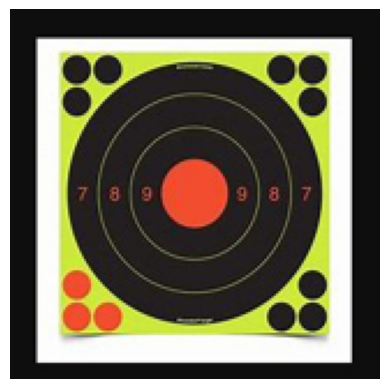

1/1 [==============================] - 0s 22ms/step
Clase 0: 1.000
Clase 1: 0.000
1/1 [==============================] - 0s 23ms/step
La clase predicha es Diana (número 0) con una precisión de 1.000.


In [ ]:
import os
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

def categorizar(ruta_local, class_indices):
    # Cargar la imagen desde el conjunto de datos local
    img = Image.open(ruta_local)
    img = np.array(img).astype(float)/255

    img = cv2.resize(img, (224,224))
    prediccion = modelo.predict(img.reshape(-1,224,224,3))

    # Obtener la etiqueta de clase predicha y su precisión
    etiqueta_de_clase_predicha = np.argmax(prediccion[0], axis=-1)
    precision = round(prediccion[0][etiqueta_de_clase_predicha], 3)

    # Asignar la etiqueta de clase predicha a su nombre de clase correspondiente
    nombre_de_clase_predicho = list(class_indices.keys())[list(class_indices.values()).index(etiqueta_de_clase_predicha)]

    # Devolver el resultado
    return nombre_de_clase_predicho, etiqueta_de_clase_predicha, precision

# Solicitar al usuario que ingrese la ruta de la carpeta que contiene las imágenes
ruta_carpeta = '/content/Test'

# Comprobar si la ruta es válida
if not os.path.isdir(ruta_carpeta):
    print('La ruta especificada no es válida. Saliendo...')
else:
    # Obtener la lista de imágenes en la carpeta y ordenarla en orden ascendente
    lista_imagenes = sorted(os.listdir(ruta_carpeta))

    # Mostrar la lista de imágenes disponibles
    print('Test 8')
    print('Las imágenes disponibles son:')
    for i, imagen in enumerate(lista_imagenes):
        print(f'{i}: {imagen}')

    # Solicitar al usuario que seleccione un número de imagen
    num_imagen = int(input('Por favor, seleccione un número de imagen: '))

    # Comprobar si el número de imagen es válido
    if num_imagen < 0 or num_imagen >= len(lista_imagenes):
        print('Número de imagen inválido. Saliendo...')
    else:
        # Seleccionar la imagen correspondiente al número seleccionado
        imagen_seleccionada = lista_imagenes[num_imagen]
        ruta_imagen_seleccionada = os.path.join(ruta_carpeta, imagen_seleccionada)

        # Cargar la imagen seleccionada y mostrarla
        img = Image.open(ruta_imagen_seleccionada)
        img = img.rotate(0, expand=True)
        img = img.resize((160, 160))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # Preprocesar la imagen seleccionada
        img_copy = img.copy()
        img_copy = img_copy.resize((224, 224))
        x = np.array(img_copy).astype(float)/255
        x = np.expand_dims(x, axis=0)

        # Realizar la predicción y mostrar los resultados
        prediccion = modelo.predict(x)
        for i in range(len(prediccion[0])):
            print(f"Clase {i}: {prediccion[0][i]:.3f}")
        nombre_de_clase_predicho, etiqueta_de_clase_predicha, precision = categorizar(ruta_imagen_seleccionada, indices_de_clase)
        print(f"La clase predicha es {nombre_de_clase_predicho} (número {etiqueta_de_clase_predicha}) con una precisión de {precision:.3f}.")